In [37]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency

In [38]:
df = pd.read_csv("marketing_data.csv")

In [39]:
df.head(5)

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [40]:
df.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

Comportamiento de compras agrupado por edad 

In [41]:
# Limpieza de columna Income
df.Income = df.Income.fillna("$00,00")

def clean_income(x):
    x = x.strip("$")
    x = x.replace(",","")
    x = x.split(".")
    x = int(x[0])
    return x

df.Income = df.Income.apply(clean_income)

In [42]:
# Dar valor promedio a Income = 0
average_income = round(np.mean(df.Income))

def mean_income(x):
    if x == 0:
        x = average_income
        return x
    else:
        return x
    
df.Income = df.Income.apply(mean_income)


<Figure size 432x288 with 0 Axes>

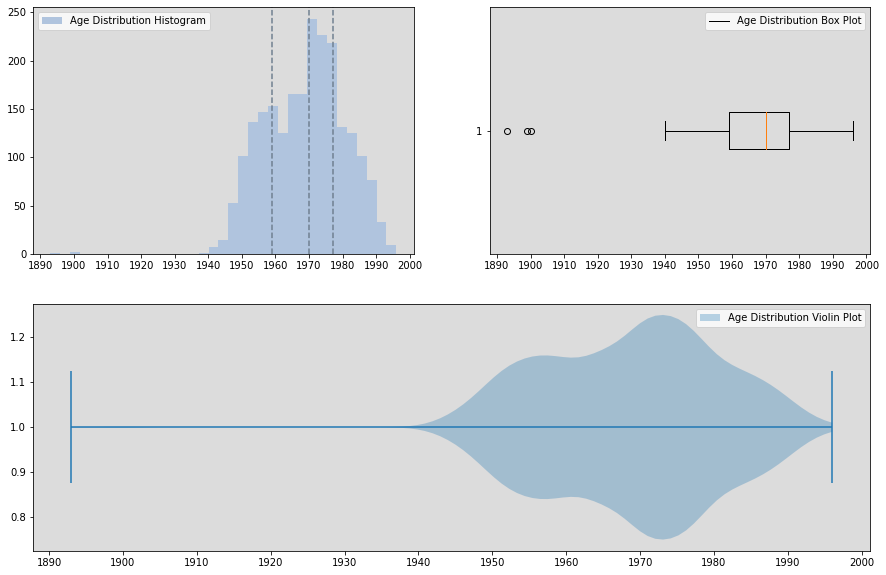

In [43]:
# Age Distribution
x_values = range(1890, 2010, 10)
plt.clf()

plt.figure(figsize = (15, 10))
ax1 = plt.subplot(2, 2, 1)
ax1.hist(df.YearBirth, bins = 35, label = "Age Distribution Histogram", color = "lightsteelblue")
ax1.set_facecolor("gainsboro")
for i in range(25, 100, 25):
    ax1.axvline(np.quantile(df.YearBirth, i/100), color = "slategrey", linestyle = "--")
ax1.set_xticks(x_values)
plt.legend()

ax2 = plt.subplot(2, 2, 2)
ax2.boxplot(df.YearBirth, vert = False)
plt.legend(["Age Distribution Box Plot"])
ax2.set_facecolor("gainsboro")
ax2.set_xticks(x_values)

ax3 = plt.subplot(2, 1, 2)
ax3.violinplot(df.YearBirth, vert = False)
plt.legend(["Age Distribution Violin Plot"])
ax3.set_facecolor("gainsboro")
ax3.set_xticks(x_values)

plt.show()

In [44]:
# Crear grupos de edad
group_ages = ["1940-1949", "1950-1959", "1960-1969", "1970-1979", "1980-1989", "1990-2000"]

def group_select(x):
    if x >= 1893 and x <= 1949:
        return group_ages[0]
    elif x >= 1950 and x <= 1959:
        return group_ages[1]
    elif x >= 1960 and x <= 1969:
        return group_ages[2]
    elif x >= 1970 and x <= 1979:
        return group_ages[3]
    elif x >= 1980 and x <= 1989:
        return group_ages[4]
    elif x >= 1990 and x <= 2000:
        return group_ages[5]

df["group_age"] = df.YearBirth.apply(group_select)

<Figure size 432x288 with 0 Axes>

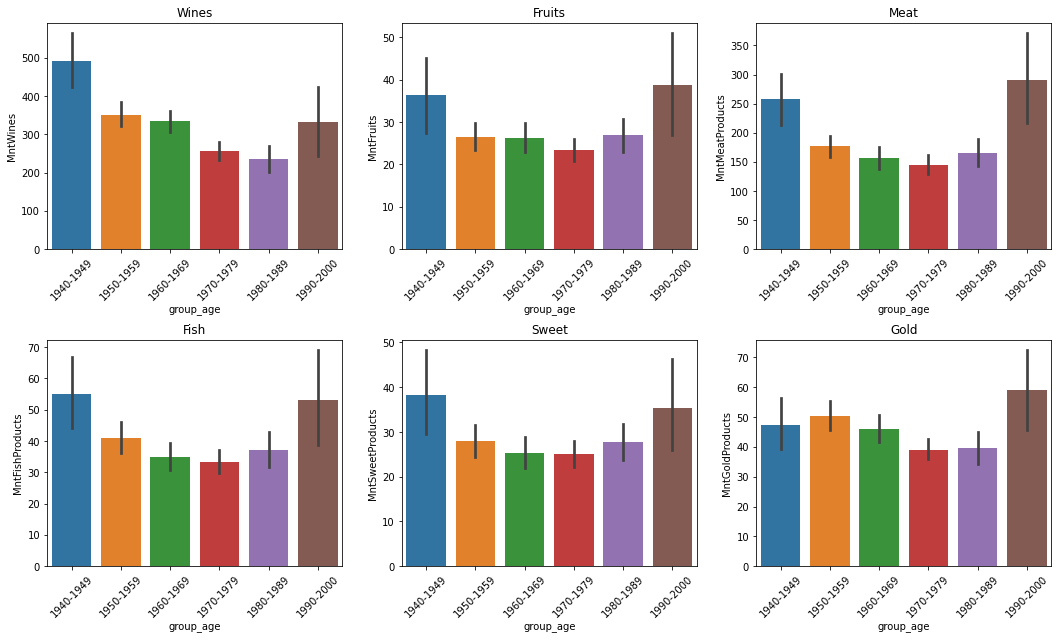

In [45]:
plt.clf()

x_values = range(len(group_ages))

f, axes = plt.subplots(2, 3, figsize = (18, 10))

f1 = sns.barplot(ax = axes[0, 0], data = df, x = "group_age", y =  "MntWines", order = group_ages)
f1.set_xticklabels(f1.get_xticklabels(), rotation=45)
f1.set_title("Wines")

f2 =sns.barplot(ax = axes[0, 1], data = df, x = "group_age", y = "MntFruits", order = group_ages)
f2.set_xticklabels(f2.get_xticklabels(), rotation=45)
f2.set_title("Fruits")


f3 = sns.barplot(ax = axes[0, 2], data = df, x = "group_age", y = "MntMeatProducts", order = group_ages)
f3.set_xticklabels(f3.get_xticklabels(), rotation=45)
f3.set_title("Meat")

f4 = sns.barplot(ax = axes[1, 0], data = df, x = "group_age", y = "MntFishProducts", order = group_ages)
f4.set_xticklabels(f4.get_xticklabels(), rotation=45)
f4.set_title("Fish")


f5 = sns.barplot(ax = axes[1, 1], data = df, x = "group_age", y = "MntSweetProducts", order = group_ages)
f5.set_xticklabels(f5.get_xticklabels(), rotation=45)
f5.set_title("Sweet")


f6 = sns.barplot(ax = axes[1, 2], data = df, x = "group_age", y = "MntGoldProducts", order = group_ages)
f6.set_xticklabels(f6.get_xticklabels(), rotation=45)
f6.set_title("Gold")


plt.subplots_adjust(hspace= 0.4)

plt.show()

In [46]:
def total_spent(x):
    total = x.MntWines + x.MntFruits + x.MntMeatProducts + x.MntFishProducts + x.MntSweetProducts + x.MntGoldProducts
    return total

df["total_spent"] = df.apply(total_spent, axis = 1)

Text(0.5, 1.0, 'Mean Spent by Group Ages')

<Figure size 432x288 with 0 Axes>

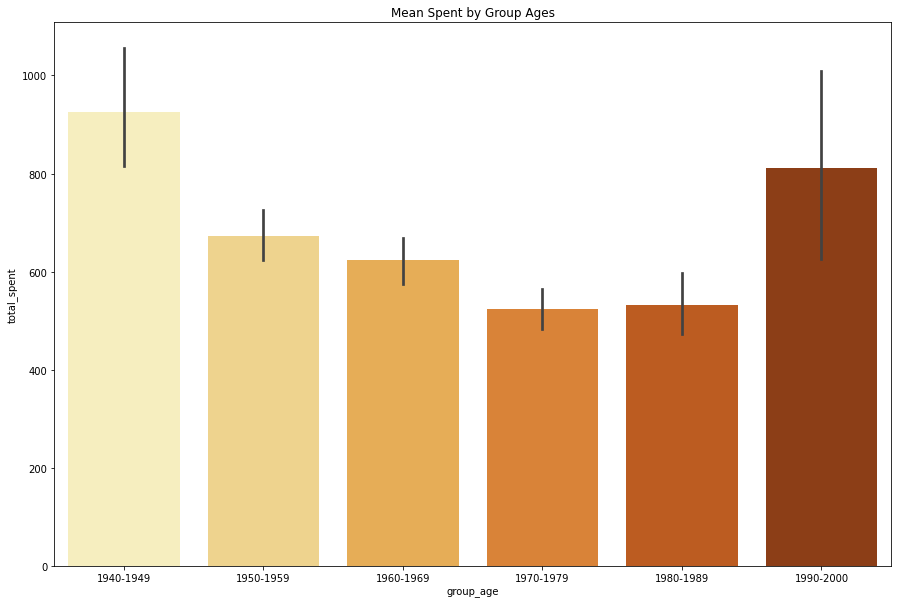

In [47]:
plt.clf()
plt.figure(figsize = (15, 10))
sns.barplot(data = df, x = "group_age", y = "total_spent", palette = "YlOrBr", order = group_ages)
plt.title("Mean Spent by Group Ages")

<Figure size 432x288 with 0 Axes>

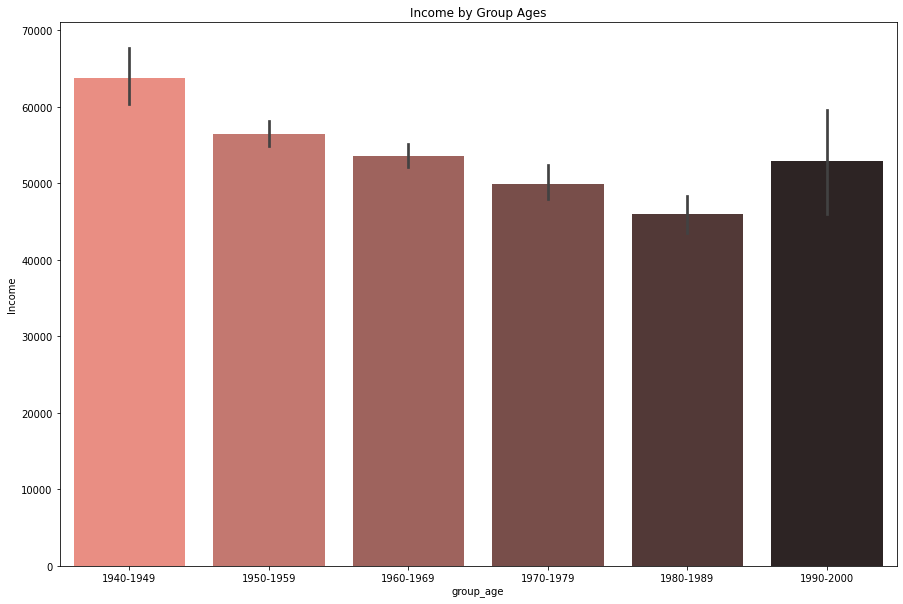

In [48]:
# Check Income by Group Ages
plt.clf()
plt.figure(figsize = (15, 10))
sns.barplot(data = df, x = "group_age", y = "Income", palette = "dark:salmon_r", order = group_ages)
plt.title("Income by Group Ages")
plt.show()

Education  2n Cycle  Basic  Graduation  Master  PhD
group_age                                          
1940-1949         4      1          28      26   51
1950-1959        32      3         245      82   98
1960-1969        30      8         249      96  123
1970-1979        79     18         378     115  150
1980-1989        50     16         191      46   60
1990-2000         8      8          36       5    4
Dependent (reject H0)


<Figure size 432x288 with 0 Axes>

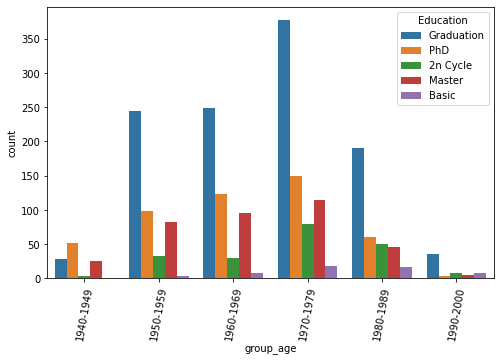

In [49]:
# Relacion Entre Group Ages - > Marital Status / Education
age_education = pd.crosstab(df.group_age, df.Education)
print(age_education)
stat, p, dof, expected = chi2_contingency(age_education)

alpha = 0.05
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

plt.clf()
plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = "group_age", hue = "Education", order = group_ages)
plt.xticks(rotation = 80)
plt.show()


MaritalStatus  Absurd  Alone  Divorced  Married  Single  Together  Widow  YOLO
group_age                                                                     
1940-1949           0      0         8       40      14        31     17     0
1950-1959           1      1        54      157      82       138     27     0
1960-1969           0      0        69      182     101       134     20     0
1970-1979           0      1        87      312     142       183     13     2
1980-1989           0      1        14      154     109        85      0     0
1990-2000           1      0         0       19      32         9      0     0
Dependent (reject H0)


<Figure size 432x288 with 0 Axes>

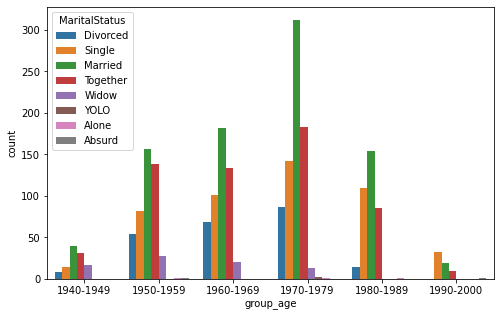

In [50]:
age_marital = pd.crosstab(df.group_age, df.MaritalStatus)
print(age_marital)
stat, p, dof, expected = chi2_contingency(age_marital)

alpha = 0.05
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

plt.clf()
plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = "group_age", hue = "MaritalStatus", order = group_ages)
plt.show()

In [63]:
df["Age"] = 2000 - df.YearBirth 

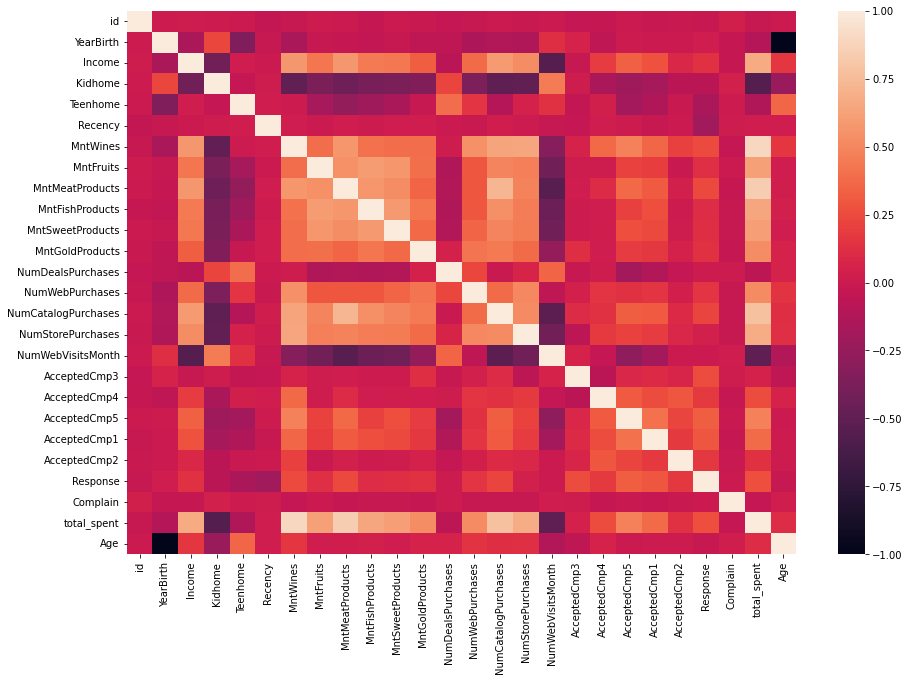

In [67]:
f, axes = plt.subplots(figsize = (15, 10))
sns.heatmap(data = df.corr())
plt.show()